<a href="https://colab.research.google.com/github/alsgud2659/ai/blob/main/%EC%95%88%EB%A9%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Client ID : FeOO1PnkrHQf_z2UpHLG

# Client Secret : PGV105_Qcn

import os         # 운영체제 접근
import sys        # 시스템 접근
import requests   # 웹 접근


client_id = "FeOO1PnkrHQf_z2UpHLG"
client_secret = "PGV105_Qcn"


url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식


files = {'image': open('image5.jpg', 'rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)


rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":640,"height":417},"faceCount":6},"faces":[{"roi":{"x":327,"y":244,"width":35,"height":35},"landmark":{"leftEye":{"x":337,"y":251},"rightEye":{"x":352,"y":254},"nose":{"x":342,"y":260},"leftMouth":{"x":333,"y":268},"rightMouth":{"x":351,"y":270}},"gender":{"value":"female","confidence":0.999766},"age":{"value":"51~55","confidence":1.0},"emotion":{"value":"laugh","confidence":0.9903},"pose":{"value":"frontal_face","confidence":0.994276}},{"roi":{"x":222,"y":256,"width":36,"height":36},"landmark":{"leftEye":{"x":231,"y":263},"rightEye":{"x":248,"y":262},"nose":{"x":240,"y":272},"leftMouth":{"x":233,"y":282},"rightMouth":{"x":250,"y":280}},"gender":{"value":"female","confidence":0.999821},"age":{"value":"56~60","confidence":0.488204},"emotion":{"value":"laugh","confidence":0.566136},"pose":{"value":"frontal_face","confidence":0.995075}},{"roi":{"x":528,"y":227,"width":40,"height":40},"landmark":{"leftEye":{"x":538,"y":237},"rightEye":{"x":556,"y":236},"nose":{"x":5

In [50]:
import json

parsed= json.loads(response.text)

type(parsed)

print(json.dumps(parsed))

{"info": {"size": {"width": 640, "height": 417}, "faceCount": 6}, "faces": [{"roi": {"x": 327, "y": 244, "width": 35, "height": 35}, "landmark": {"leftEye": {"x": 337, "y": 251}, "rightEye": {"x": 352, "y": 254}, "nose": {"x": 342, "y": 260}, "leftMouth": {"x": 333, "y": 268}, "rightMouth": {"x": 351, "y": 270}}, "gender": {"value": "female", "confidence": 0.999766}, "age": {"value": "51~55", "confidence": 1.0}, "emotion": {"value": "laugh", "confidence": 0.9903}, "pose": {"value": "frontal_face", "confidence": 0.994276}}, {"roi": {"x": 222, "y": 256, "width": 36, "height": 36}, "landmark": {"leftEye": {"x": 231, "y": 263}, "rightEye": {"x": 248, "y": 262}, "nose": {"x": 240, "y": 272}, "leftMouth": {"x": 233, "y": 282}, "rightMouth": {"x": 250, "y": 280}}, "gender": {"value": "female", "confidence": 0.999821}, "age": {"value": "56~60", "confidence": 0.488204}, "emotion": {"value": "laugh", "confidence": 0.566136}, "pose": {"value": "frontal_face", "confidence": 0.995075}}, {"roi": {"x

In [51]:
print(parsed['info'])

{'size': {'width': 640, 'height': 417}, 'faceCount': 6}


In [52]:
parsed['faces'][0]['roi']

{'height': 35, 'width': 35, 'x': 327, 'y': 244}

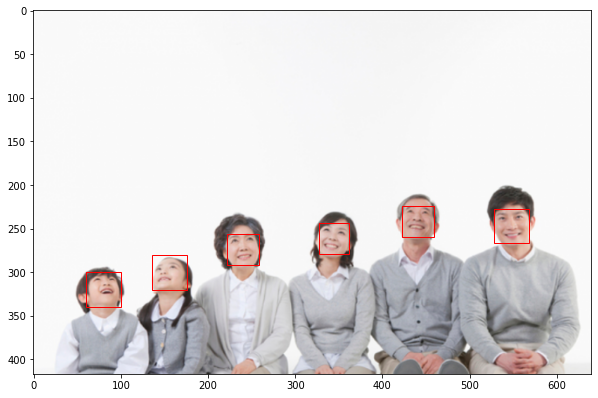

In [55]:
import matplotlib.pyplot as plt          # 사진(그림) 관련 기본 모듈
import matplotlib.image as mpimg     # 사진 읽어오는 모듈
import matplotlib.patches as patches  # 사진 수정 관련 모듈

img = mpimg.imread('image5.jpg')     # 사진 읽어오기
fig, ax = plt.subplots(figsize = (10, 10))                      # 사진을 표시할 액자틀과 사진틀 설정
ax.imshow(img)                               # 사진틀에 사진 삽입 

for each in parsed['faces']:
  x,y,w,h = each['roi'].values() # 인식한 얼굴의 roi 위치정보를 변수로 할당
  re_face = patches.Rectangle((x,y),w,h, facecolor='none', edgecolor='r')  # 그 위치에 사각형을 표시 정보
  ax.add_patch(re_face)    

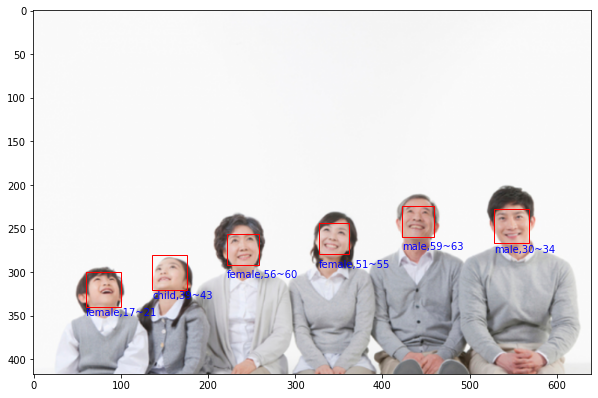

In [66]:
import matplotlib.pyplot as plt          # 사진(그림) 관련 기본 모듈
import matplotlib.image as mpimg     # 사진 읽어오는 모듈
import matplotlib.patches as patches  # 사진 수정 관련 모듈

img = mpimg.imread('image5.jpg')     # 사진 읽어오기
fig, ax = plt.subplots(figsize = (10, 10))                      # 사진을 표시할 액자틀과 사진틀 설정
ax.imshow(img)                               # 사진틀에 사진 삽입 



for each in parsed['faces']:
  x,y,w,h = each['roi'].values()
  age, age_conf = each['age'].values()
  gender, gender_conf = each['gender'].values()
  anno = gender + ',' + age
  re_face = patches.Rectangle((x,y),w,h, facecolor='none', edgecolor='r')  # 그 위치에 사각형을 표시 정보
  plt.text(x,y + 50, anno, color = 'blue')
  ax.add_patch(re_face)